In [41]:
import tensorflow as tf
from IPython.display import clear_output
tf.keras.utils.set_random_seed(42)
import skdim
import time
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import f1_score
import math
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
import plotly.express as px
from sklearn import datasets, decomposition

### Import Data ###

In [2]:
filename = 'data/dataset1.pkl'

with open(filename, 'rb') as f:
    data_tuples = pickle.load(f)
f.close()

In [3]:
print('Number of Data Points:', len(data_tuples))
class_labels = []
for i in range(len(data_tuples)):
    class_labels.append(data_tuples[i][1])

print('Class Labels:', len(set(class_labels)))
print('Feature Count:', len(data_tuples[0][0]))

Number of Data Points: 1000
Class Labels: 2
Feature Count: 200


### Perform Estimation ###

In [4]:
data = pd.DataFrame([i[0] for i in data_tuples])
data = (data - np.min(data)) / (np.max(data) - np.min(data))
labels = pd.DataFrame([i[1] for i in data_tuples])

In [5]:
data_0 = [i[0] for i in data_tuples if i[1] == 0]
data_1 = [i[0] for i in data_tuples if i[1] == 1]

In [6]:
for i, d in enumerate([data_0, data_1]):

    #estimate global intrinsic dimension:
    est = skdim.id.lPCA().fit(d)

    print("[{}] lPCA (PFO):".format(i), np.mean(est.dimension_))

    #estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
    est = skdim.id.MOM().fit(d, n_neighbors = round(math.sqrt(len(data_tuples))), n_jobs = -1,)

    print("[{}] MOM:".format(i), np.mean(est.dimension_pw_))

[0] lPCA (PFO): 131.0
[0] MOM: 41.07058987340877
[1] lPCA (PFO): 131.0
[1] MOM: 41.608662470739745


### Visualize Data (2D) ###
Non-Linear Projection

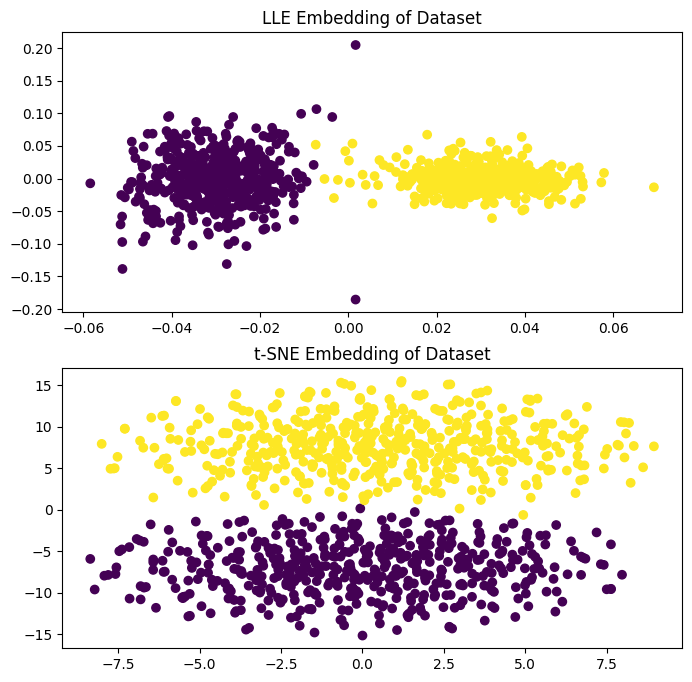

In [7]:
n_neighbors = round(math.sqrt(len(data_tuples)))

sr_lle, sr_err = manifold.locally_linear_embedding(
    data, n_neighbors=n_neighbors, n_components=2, random_state=0
)

sr_tsne = manifold.TSNE(n_components=2, perplexity=n_neighbors, random_state=0).fit_transform(
    data
)

fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sr_lle[:, 0], sr_lle[:, 1], c=labels)
axs[0].set_title("LLE Embedding of Dataset")
axs[1].scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=labels)
_ = axs[1].set_title("t-SNE Embedding of Dataset")

### Visualize Data (3D) ###
Non-Linear Projection

In [45]:
sr_lle, sr_err = manifold.locally_linear_embedding(
    data, n_neighbors=n_neighbors, n_components=3, random_state=0
)

sr_tsne = manifold.TSNE(n_components=3, perplexity=n_neighbors, random_state=0).fit_transform(
    data
)

In [46]:
df = pd.DataFrame(sr_tsne)
df['labels'] = labels

fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='labels')
fig.show()

In [47]:
df = pd.DataFrame(sr_lle)
df['labels'] = labels

fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='labels')
fig.show()

PCA Projection

In [44]:
X = data
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

df = pd.DataFrame(X)
df['labels'] = labels

fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='labels')
fig.show()